In [21]:
import numpy as np
import matplotlib.pyplot as plt
# import scipy as sp --- from scipy import xxx
import pandas as pd
import seaborn as sns

In [22]:
song_data = pd.read_csv("./data/song_data.csv").drop(columns=['song_name'])
features = song_data.columns.drop('song_popularity')

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [24]:
# Data preparation
X = song_data[features].values  # Use features selected from previous step
y = song_data['song_popularity'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


Epoch 500/2500, Train Loss: 430.6419, Test Loss: 440.4752
Epoch 1000/2500, Train Loss: 420.2988, Test Loss: 437.6580
Epoch 1500/2500, Train Loss: 413.1418, Test Loss: 435.5910
Epoch 2000/2500, Train Loss: 414.6450, Test Loss: 442.0407
Epoch 2500/2500, Train Loss: 413.9474, Test Loss: 442.5474


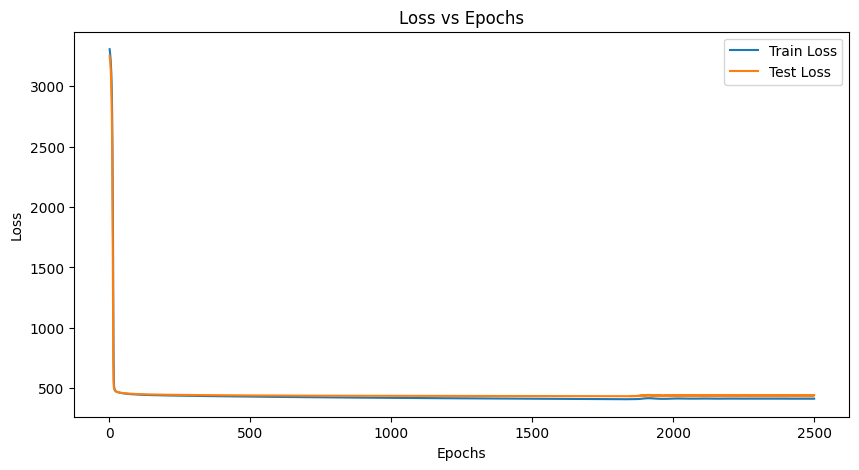

/var/folders/xj/0mzzfw7d6t7__v00t18jd8nw0000gp/T/ipykernel_11037/171918860.py:67: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')


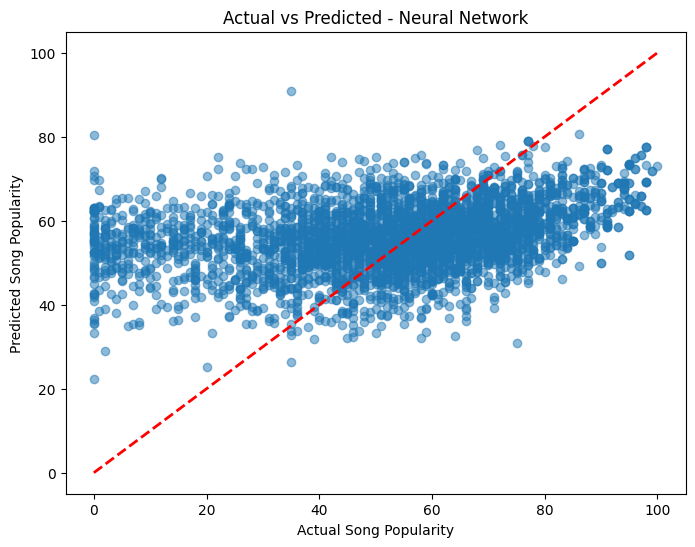

In [14]:

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss function, and optimizer
input_size = X_train_tensor.shape[1]
model = SimpleNN(input_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training the model
epochs = 2500
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    train_loss = criterion(y_pred, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    
    # Evaluation
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_tensor)
        test_loss = criterion(y_test_pred, y_test_tensor)
    
    # Record losses
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    
    # Print progress
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Visualization of loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

# Visualization of Actual vs Predicted
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor).numpy()
    
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel("Actual Song Popularity")
plt.ylabel("Predicted Song Popularity")
plt.title("Actual vs Predicted - Neural Network")
plt.show()


Epoch 250/1500, Train Loss: 2514.5886, Test Loss: 2494.2349
Epoch 500/1500, Train Loss: 1395.1785, Test Loss: 1464.8239
Epoch 750/1500, Train Loss: 648.8884, Test Loss: 734.1518
Epoch 1000/1500, Train Loss: 424.5091, Test Loss: 460.4617
Epoch 1250/1500, Train Loss: 376.1351, Test Loss: 398.0680
Epoch 1500/1500, Train Loss: 360.6424, Test Loss: 402.7504


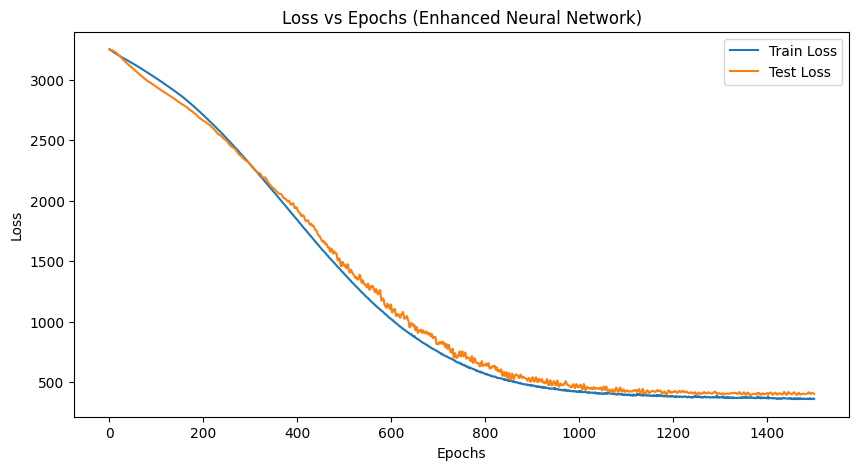

/var/folders/xj/0mzzfw7d6t7__v00t18jd8nw0000gp/T/ipykernel_11037/3812039449.py:74: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')


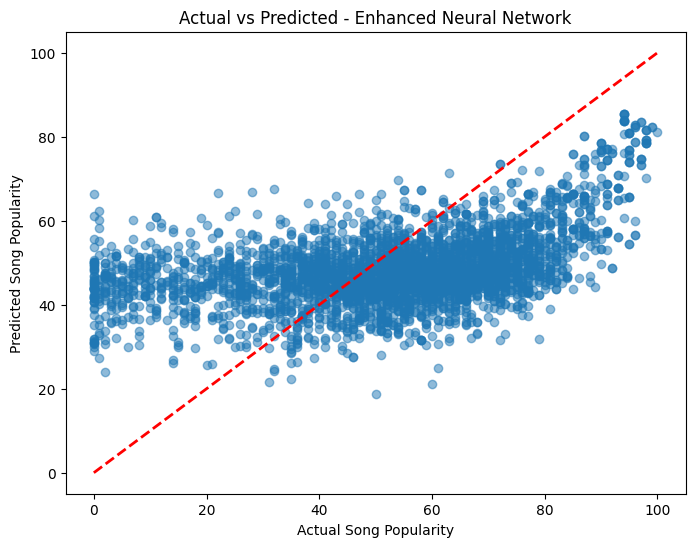

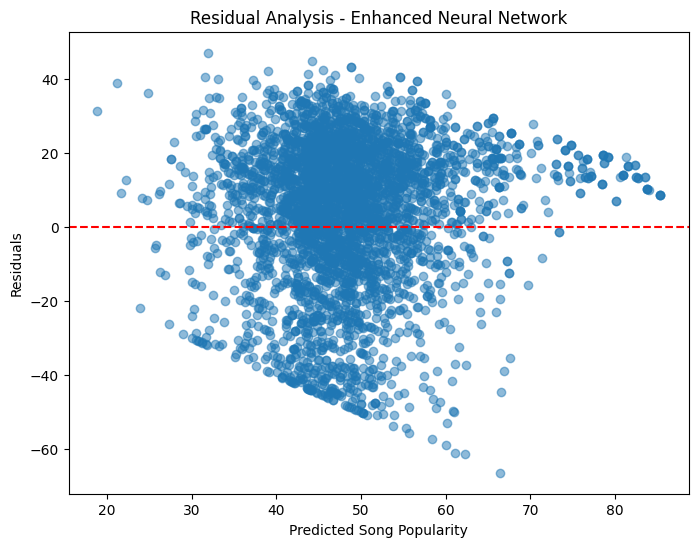

In [18]:
# Define the enhanced neural network
class EnhancedNN(nn.Module):
    def __init__(self, input_size):
        super(EnhancedNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.network(x)

# Initialize model, loss function, and optimizer
input_size = X_train_tensor.shape[1]
model = EnhancedNN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 1500
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    train_loss = criterion(y_pred, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    
    # Evaluation phase
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_tensor)
        test_loss = criterion(y_test_pred, y_test_tensor)
    
    # Record losses
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    
    # Print progress
    if (epoch + 1) % 250 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Visualization of loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs (Enhanced Neural Network)')
plt.legend()
plt.show()

# Visualization of Actual vs Predicted
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor).numpy()
    
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel("Actual Song Popularity")
plt.ylabel("Predicted Song Popularity")
plt.title("Actual vs Predicted - Enhanced Neural Network")
plt.show()

# Residual Analysis
residuals = y_test - y_test_pred.flatten()
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Song Popularity")
plt.ylabel("Residuals")
plt.title("Residual Analysis - Enhanced Neural Network")
plt.show()
